# Reto | Segmentación de Datos Empleados

## 2. Carga los datos del archivo.
### a) Descarga el archivo en la plataforma kaggle.com
### b) Abre el archivo Train.csv para conocer su estructura y familiarizarse con la información contenida en él.
### c) Crea un DataFrame en pandas para el archivo.

In [1]:
import pandas as pd
import numpy as np

Empleados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Deserción de Empleados/Train.csv")

Empleados

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


## Transforma los datos según las características de las variables:
• Puede usar diferentes métodos de transformación, como OrdinalEncoder, OneHotEncoder,
StandardEncoder, NormalizerEncoder, etc.

• La selección de las variables y de estos métodos depende del modelo de su solución y será
evaluada su pertenencia según los datos

In [2]:
Empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

Employee ID no es necesaria, asi que se puede eliminar


In [3]:
Empleados.drop("Employee_ID", axis=1, inplace=True)

In [4]:
Empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     7000 non-null   object 
 1   Age                        6588 non-null   float64
 2   Education_Level            7000 non-null   int64  
 3   Relationship_Status        7000 non-null   object 
 4   Hometown                   7000 non-null   object 
 5   Unit                       7000 non-null   object 
 6   Decision_skill_possess     7000 non-null   object 
 7   Time_of_service            6856 non-null   float64
 8   Time_since_promotion       7000 non-null   int64  
 9   growth_rate                7000 non-null   int64  
 10  Travel_Rate                7000 non-null   int64  
 11  Post_Level                 7000 non-null   int64  
 12  Pay_Scale                  6991 non-null   float64
 13  Compensation_and_Benefits  7000 non-null   objec

Ya que gender, relationship status, decision_skill_process tienen pocas variables, se usará OneHoteEncoder

In [5]:
from sklearn.preprocessing import OneHotEncoder

OneHot = OneHotEncoder()
OneHot.fit(Empleados[["Gender"]])
Gender_onehot = OneHot.transform(Empleados[["Gender"]]).toarray()

Empleados = Empleados.assign(Gender_Female = Gender_onehot[:,0],
                             Gender_Male = Gender_onehot[:,1])

Empleados.drop("Gender", axis=1, inplace=True)

Aunque se puede seguir haciendo con este encoder, un método más rápido es usando la función get_dummies de Pandas

In [6]:
def cat_a_num(serie, df):
  df_temporal = pd.get_dummies(df[serie], prefix=serie)
  df = pd.concat([df,df_temporal], axis=1)
  df.drop(serie,axis=1, inplace=True)
  return df

Empleados = cat_a_num("Relationship_Status", Empleados)
Empleados = cat_a_num("Decision_skill_possess", Empleados)

In [7]:
Empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6588 non-null   float64
 1   Education_Level                    7000 non-null   int64  
 2   Hometown                           7000 non-null   object 
 3   Unit                               7000 non-null   object 
 4   Time_of_service                    6856 non-null   float64
 5   Time_since_promotion               7000 non-null   int64  
 6   growth_rate                        7000 non-null   int64  
 7   Travel_Rate                        7000 non-null   int64  
 8   Post_Level                         7000 non-null   int64  
 9   Pay_Scale                          6991 non-null   float64
 10  Compensation_and_Benefits          7000 non-null   object 
 11  Work_Life_balance                  6989 non-null   float

Las variables restantes tienen varios elementos, por lo que me parece pertinente usar Ordinal Encoder, las variables son Hometown, Unit y Compensation_and_Benefits

In [8]:
def cat_a_ord(serie, df, encoder):
  encoder.fit(df[[serie]])
  array_encoder = encoder.transform(df[[serie]])
  df[serie] = array_encoder[:,0]
  return df

from sklearn.preprocessing import OrdinalEncoder

Ordinal = OrdinalEncoder()

Empleados = cat_a_ord("Hometown", Empleados, Ordinal)
Empleados = cat_a_ord("Unit", Empleados, Ordinal)

Empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6588 non-null   float64
 1   Education_Level                    7000 non-null   int64  
 2   Hometown                           7000 non-null   float64
 3   Unit                               7000 non-null   float64
 4   Time_of_service                    6856 non-null   float64
 5   Time_since_promotion               7000 non-null   int64  
 6   growth_rate                        7000 non-null   int64  
 7   Travel_Rate                        7000 non-null   int64  
 8   Post_Level                         7000 non-null   int64  
 9   Pay_Scale                          6991 non-null   float64
 10  Compensation_and_Benefits          7000 non-null   object 
 11  Work_Life_balance                  6989 non-null   float

La variable Compensation_and_Benefits está generando problemas, ya que entre sus datos, tiene valores con números y strings, así que se reemplazará de manera más directa

In [9]:
Empleados["Compensation_and_Benefits"].unique()

array(['type2', 'type3', 'type0', 'type4', 'type1'], dtype=object)

In [10]:
Empleados.loc[Empleados['Compensation_and_Benefits']=="type0", "Compensation_and_Benefits"]=0
Empleados.loc[Empleados['Compensation_and_Benefits']=="type1", "Compensation_and_Benefits"]=1
Empleados.loc[Empleados['Compensation_and_Benefits']=="type2", "Compensation_and_Benefits"]=2
Empleados.loc[Empleados['Compensation_and_Benefits']=="type3", "Compensation_and_Benefits"]=3
Empleados.loc[Empleados['Compensation_and_Benefits']=="type4", "Compensation_and_Benefits"]=4

In [11]:
Empleados["Compensation_and_Benefits"] = Empleados['Compensation_and_Benefits'].astype("int64")

In [12]:
Empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6588 non-null   float64
 1   Education_Level                    7000 non-null   int64  
 2   Hometown                           7000 non-null   float64
 3   Unit                               7000 non-null   float64
 4   Time_of_service                    6856 non-null   float64
 5   Time_since_promotion               7000 non-null   int64  
 6   growth_rate                        7000 non-null   int64  
 7   Travel_Rate                        7000 non-null   int64  
 8   Post_Level                         7000 non-null   int64  
 9   Pay_Scale                          6991 non-null   float64
 10  Compensation_and_Benefits          7000 non-null   int64  
 11  Work_Life_balance                  6989 non-null   float

Por último, no se puede trabajar bien con este tipo de algoritmos si se cuentan con datos NaN, por lo que hay que realizar algo al respecto. En mi opinión, lo mejor es reemplazar estos datos por su media

In [13]:
Empleados["Age"] = Empleados["Age"].fillna(Empleados["Age"].mean())
Empleados["Time_of_service"] = Empleados["Time_of_service"].fillna(Empleados["Time_of_service"].mean())
Empleados["Pay_Scale"] = Empleados["Pay_Scale"].fillna(Empleados["Pay_Scale"].mean())
Empleados["Work_Life_balance"] = Empleados["Work_Life_balance"].fillna(Empleados["Work_Life_balance"].mean())
Empleados["VAR2"] = Empleados["VAR2"].fillna(Empleados["VAR2"].mean())
Empleados["VAR4"] = Empleados["VAR4"].fillna(Empleados["VAR4"].mean())

## Selecciona el número de grupos adecuados para agrupar usando K-means:
• Ejecuta el algoritmo K-means con distintos números de grupos y almacena los resultados.

• Utiliza una estrategia para determinar el número adecuado de grupos como K Elbow o -Silhouette-Plot.

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

preds_y = []
resultados_silhouette = {}

for i in range(2,12):
  kmeans = KMeans(n_clusters = i, n_init="auto").fit(Empleados)
  y_pred = kmeans.predict(Empleados)
  preds_y.append(y_pred)
  resultados_silhouette[i]= (silhouette_score(Empleados, y_pred))

print(resultados_silhouette)

{2: 0.32936663290550433, 3: 0.3466868455390912, 4: 0.34577602829222776, 5: 0.29128646998687546, 6: 0.28379278924146867, 7: 0.280099206504118, 8: 0.2665580411967241, 9: 0.25306300030616363, 10: 0.23489766868765186, 11: 0.23043432821799514}


Para evaluar el número correcto de grupos, se usará K-Elbow

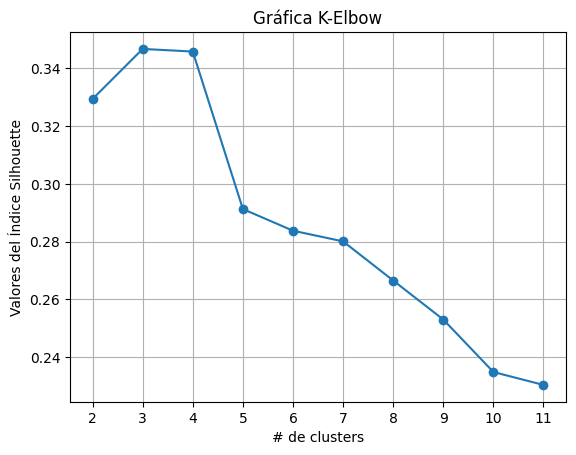

In [15]:
import matplotlib.pyplot as plt

clusters_counts = list(resultados_silhouette.keys())
index_values = list(resultados_silhouette.values())

plt.plot(clusters_counts, index_values, "o-")
plt.grid(True)
plt.xlabel("# de clusters")
plt.xticks(clusters_counts)
plt.title("Gráfica K-Elbow")
plt.ylabel("Valores del Índice Silhouette")
plt.show()

Por la forma de la gráfica podríamos decir que valores de grupos interesantes se alcanzan a ver en 3, 4, 7, 8 y 11

In [16]:
Empleados["groups"] = preds_y[1]
Empleados

,Age,Education_Level,Hometown,Unit,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,...,Attrition_rate,Gender_Female,Gender_Male,Relationship_Status_Married,Relationship_Status_Single,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,groups
0,42.0,4,1.0,2.0,4.0,4,33,1,1,7.0,...,0.1841,1.0,0.0,True,False,False,False,True,False,2
1,24.0,3,3.0,3.0,5.0,4,36,0,3,6.0,...,0.0670,0.0,1.0,False,True,True,False,False,False,2
2,58.0,3,0.0,8.0,27.0,3,51,0,2,8.0,...,0.0851,1.0,0.0,True,False,False,False,True,False,1
3,26.0,3,2.0,1.0,4.0,3,56,1,3,8.0,...,0.0668,1.0,0.0,False,True,False,True,False,False,0
4,31.0,1,3.0,3.0,5.0,4,62,1,3,2.0,...,0.1827,1.0,0.0,True,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,23.0,5,1.0,5.0,4.0,1,20,1,2,6.0,...,0.7839,1.0,0.0,True,False,False,True,False,False,2
6996,44.0,1,2.0,9.0,16.0,2,59,0,2,4.0,...,0.1055,1.0,0.0,True,False,True,False,False,False,0
6997,49.0,3,3.0,2.0,10.0,1,59,1,2,3.0,...,0.7847,1.0,0.0,False,True,False,False,False,True,0
6998,47.0,3,4.0,10.0,24.0,1,21,1,5,8.0,...,0.4162,1.0,0.0,True,False,False,True,False,False,2


## Segmenta el DataFrame original creando nuevos DataFrames con los empleados separados por grupo:
• Crea una nueva tabla resumen con los estadísticos adecuados que describa el
comportamiento de las variables por grupo.


In [17]:
Empleadosdf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/Deserción de Empleados/Train.csv")
Empleadosdf = Empleadosdf.drop("Employee_ID", axis=1)
Empleadosdf["groups"] = preds_y[1]

# crear una lista de dataframes
Empleados_grupos = [Empleadosdf[Empleadosdf['groups']==g] for g in range(3)]

grouped = pd.DataFrame() #Inicializar un dataframe vacío

# Añadir una columna para poner el nombre de las variables en cada fila
grouped['Features'] = Empleadosdf.columns[:-1]

# Algoritmo para llenar el dataframe con el promedio de cada variable dentro de cada grupo
for g in range(3):
  row = []
  for col in grouped['Features']:
    if Empleados_grupos[g][col].dtype != 'object':
      row.append(np.round(Empleados_grupos[g][col].mean(),2))
    else:
	    row.append(Empleados_grupos[g][col].value_counts().keys()[0])
  grouped['Group'+str(g)] = row
# Visualizar el dataframe
grouped


,Features,Group0,Group1,Group2
0,Gender,F,F,F
1,Age,31.91,55.85,31.98
2,Education_Level,3.2,3.18,3.19
3,Relationship_Status,Married,Married,Married
4,Hometown,Lebanon,Lebanon,Lebanon
5,Unit,IT,IT,IT
6,Decision_skill_possess,Analytical,Directive,Analytical
7,Time_of_service,7.56,26.13,7.78
8,Time_since_promotion,2.33,2.47,2.31
9,growth_rate,60.88,47.15,32.34


## Interpreta los resultados obtenidos:
• Genera diferentes visualizaciones que ayuden a mostrar las características que tienen en
común los empleados dentro de cada grupo.

• Redacta una historia con las conclusiones más importantes del análisis de manera que
ayude a la toma de decisiones.

Cómo pudimos observar previamente con la gráfica de K-Elbow, tres grupos rompía el patrón del silhouette score y resultaba interesante analizarlo.

Para poder ver las diferencias de manera más sencilla se puede graficar para observar las diferencias más claramente. Para lograr esto se realizó una gráfica de cajas y bigotes para las diferentes variables, sin embargo para que estas se puedan comparar en un mismo grupo, es importante transformar los datos, lo cuál se hizo por medio de StandarScaler, sumado a esto, no se graficaron todas las variables, solo aquellas que mostraran diferencias más claras entre grupos y se pudieran resaltar en el gráfico.

In [18]:
from sklearn.preprocessing import StandardScaler

Empleados1 = Empleados[["Age", "Time_of_service",
                        "Time_since_promotion", "growth_rate",
                        "Decision_skill_possess_Analytical",
                        "Decision_skill_possess_Conceptual", "Decision_skill_possess_Behavioral",
                        "Decision_skill_possess_Directive",
                        "Attrition_rate", "groups"]].sort_values("groups")
groups = Empleados1["groups"]
Empleados1 = Empleados1[Empleados1.columns[:-1]]

Xt = StandardScaler().fit_transform(Empleados1.to_numpy())

x = ["group "+str(g) for g in groups]

In [19]:
import plotly.graph_objects as go

fig = go.Figure()

for j in range(len(Empleados1.columns)):
  fig.add_trace(go.Box(
      y=Xt[:,j],
      x=x,
      boxpoints=False,
      name=Empleados1.columns[j]
  ))

fig.update_layout(
    title="Variable boxplot grouped",
    yaxis_title="normalized values",
    boxmode="group"
)

fig.show()

Se observan claramente los tres grupos y por el gráfico, se notan diferencias entre ellos a continuación se resaltarán los aspectos más relevantes que diferencien a cada grupo.

Uno de los aspectos que me parece importante resaltar y muestra una clara diferencia entre grupos es la edad, donde el grupo 0 y 2 muestran valores similares, y el 1 es muy diferente a ambos siendo mucho más alto. Este grupo que contiene edades más altas se espera que igual incluya diferencias relacionadas a la edad, siendo por ejemplo el grupo con la media de trabajo en la empresa más alta comparándolo con los otros dos grupos. Sin embargo otro dato que lo destaca de los otros dos grupos es el tipo de habilidades de decisión, las cuales solo se presentan en este grupo y son las de comportamiento y directivas, lo que es de esperarse, ya que los cargos directivos, en general son ocupados por gente de mayor edad.

Por último los grupos 0 y 2 a simple vista se ven similares en cuanto a la edad, tiempo de servicio y habilidades de decisión, sin embargo lo que distingue a los dos grupos en mi opinión son las oportunidades de crecimiento entre ambas, aunque casi todas las variables tienen valores similares, el valor de growth rate es extremadamente diferente, siendo el valor del grupo 0 el mayor de los 3, incluso mayor que el 1.

Intenmtando asignar estos grupos a ejemplos más reales, considero que el grupo 0 son trabajadores jóvenes en la empresa con oportunidad de crecimiento, mientras que el 2 son asimismo trabajadores jóvenes, pero en trabajos sin mucho crecimiento, por último el grupo 1 se conforma por los directivos y gerentes en la empresa, con edades mas avanzadas

## Descarga tu libreta de Google Colab con extensión .ipynb

## Nombra tu archivo siguiendo la nomenclatura que se te indica en Formato de entrega de la actividad